<a href="https://colab.research.google.com/github/MattJCR/Your-First-Deep-Learning-Project-in-Python-with-Keras-Step-by-Step/blob/master/Your_First_Deep_Learning_Project_in_Python_with_Keras_Step_by_Step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Your First Deep Learning Project in Python with Keras Step-by-Step
En este tutorial, descubrirás cómo crear tu primer modelo de red neuronal de aprendizaje profundo en Python utilizando Keras.
https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In [45]:
import pandas as pd
import time
import urllib.request
import tempfile
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Carga de datos

In [46]:
!wget "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataset = loadtxt('/content/pima-indians-diabetes.data.csv', delimiter=',')
dataset

--2023-02-23 16:32:45--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23278 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.data.csv.6’

pima-indians-diabet 100%[===================>]  22.73K  --.-KB/s    in 0s      

2023-02-23 16:32:45 (98.6 MB/s) - ‘pima-indians-diabetes.data.csv.6’ saved [23278/23278]



array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [47]:
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

# Definición del modelo

* La capa de entrada se define con 8 neuronas que es el total de variables de entradas.
* 12 y 8 para las capas intermedias. Y se usa la funcion de activación RELU ya que es mas eficiente y recomendada para las capas intermedias.
* La ultima capa es de 1 neurona y se usa la función de activación sigmoid ya que es una muy buena opcion para las clasificaciones binarias. En el caso de las multiclase sería mejor usar la función softmax.


In [48]:
# Definimos el modelo de Keras
model = Sequential()
input_shape = len(X[0])
print('Numero de entradas:',input_shape)

# Definimos las capas con Dense
# La primera capa se le indica el numero de parametros de entrada en input_shape (8 entradas)
# Luego se definen 12 neuronas para la capa
# Los iniciadores recomendados para relu es glorot_uniform
model.add(Dense(12, input_shape=(input_shape,), activation='relu',kernel_initializer='glorot_uniform'))

# Despues definimos las siguientes capas
# Esta capa tiene 8 neuronas
model.add(Dense(8, activation='relu',kernel_initializer='glorot_uniform'))

# Por ultimo la capa de salida. En este caso es de 1 neurona
# Los iniciadores recomendados para sigmoid es he_uniform
model.add(Dense(1, activation='sigmoid', kernel_initializer='he_uniform'))

model.summary()

Numero de entradas: 8
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 12)                108       
                                                                 
 dense_20 (Dense)            (None, 8)                 104       
                                                                 
 dense_21 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [49]:
from keras.callbacks import LearningRateScheduler
# Determina la caida de learning_rate en un 50% cada 500 epocas
def step_decay(epoch):
    initial_lr = 0.03
    drop = 0.5
    epochs_drop = 250
    lr = initial_lr * (drop ** (epoch // epochs_drop))
    return lr
# create the LearningRateScheduler object
lr_scheduler = LearningRateScheduler(step_decay)

In [50]:
# compile the keras model
learning_rate = 0.03
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [51]:
# fit the keras model on the dataset
history = model.fit(X, y, epochs=1000, batch_size=256, callbacks=[lr_scheduler])

Epoch 1/1000
3/3 [==============================] - 1s 7ms/step - loss: 10.2697 - accuracy: 0.4883 - lr: 0.0300
Epoch 2/1000
3/3 [==============================] - 0s 5ms/step - loss: 5.8337 - accuracy: 0.6068 - lr: 0.0300
Epoch 3/1000
3/3 [==============================] - 0s 6ms/step - loss: 2.2224 - accuracy: 0.5781 - lr: 0.0300
Epoch 4/1000
3/3 [==============================] - 0s 6ms/step - loss: 2.0667 - accuracy: 0.5729 - lr: 0.0300
Epoch 5/1000
3/3 [==============================] - 0s 6ms/step - loss: 1.3127 - accuracy: 0.5742 - lr: 0.0300
Epoch 6/1000
3/3 [==============================] - 0s 7ms/step - loss: 1.0488 - accuracy: 0.6263 - lr: 0.0300
Epoch 7/1000
3/3 [==============================] - 0s 7ms/step - loss: 1.1923 - accuracy: 0.6029 - lr: 0.0300
Epoch 8/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.8787 - accuracy: 0.6068 - lr: 0.0300
Epoch 9/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.7427 - accuracy: 0.6159 - lr: 0.0300


In [52]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 4ms/step - loss: 0.4000 - accuracy: 0.8073
Accuracy: 80.73


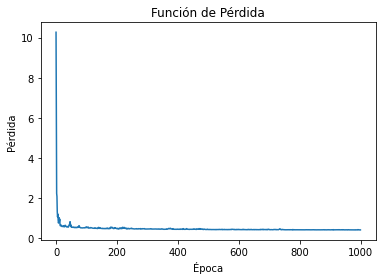

In [53]:
# Graficar la evolución de la función de pérdida
plt.plot(history.history['loss'])
plt.title('Función de Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()

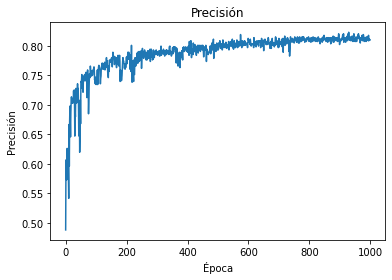

In [54]:
# Graficar la evolución de la métrica de evaluación (en este caso, precisión)
plt.plot(history.history['accuracy'])
plt.title('Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.show()